In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Read a csv file
df = pd.read_csv('../data/aevr.csv')

In [3]:
df.head().T

,0,1,2,3,4
Reporting Period,December 2020,December 2020,December 2020,December 2020,December 2020
TPV #,T10615,T10616,T10526,TPV 21-014,TPV 21-015
Variance Type,AEVR,AEVR,AEVR,AEVR,AEVR
Plat/AP#,A/P # 2608840 Fewell Custom Homes. LTd,A/P # M2628846 SARA O&M FACILITY,A/P # M2585348 Ancira South Park Nissan,AP#2587699 Sonic at Alamo Ranch,AP#2674365 Blue Ridge Ranch Units 8 & 9
Council District/ETJ,2,1,4,ETJ,2
Location,1319 Burnet St,150 Guadalupe St,8606 South IH 35,5321 Alamo Pkwy,5735 New Sulphur Springs Road
Date Submitted,12/15/2020,12/17/2020,12/4/2020,12/3/2020,12/8/2020
Decision Date,12/15/2020,12/17/2020,1/15/2021,12/4/2020,12/9/2020
Decision Outcome,Approved,Approved,Approved,Approved,Approved
Owner,Dennis Fewell,San Antonio River Authority,Joey Blackmon,Laura Foree - SDI Alamo Ranch & HTO Alamo Ranch Property Co.,David McGowen - M/I Homes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Reporting Period                364 non-null    object
 1   TPV #                           364 non-null    object
 2   Variance Type                   364 non-null    object
 3   Plat/AP#                        364 non-null    object
 4   Council District/ETJ            361 non-null    object
 5   Location                        364 non-null    object
 6   Date Submitted                  364 non-null    object
 7   Decision Date                   364 non-null    object
 8   Decision Outcome                364 non-null    object
 9   Owner                           363 non-null    object
 10  Land Use                        362 non-null    object
 11  Hardship                        363 non-null    object
 12  Project Acreage                 353 non-null    ob

In [5]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Reporting Period,0,0.000000,0,0.0,0,0.0
TPV #,0,0.000000,0,0.0,0,0.0
Variance Type,0,0.000000,0,0.0,0,0.0
Plat/AP#,0,0.000000,0,0.0,0,0.0
Council District/ETJ,3,0.824176,0,0.0,0,0.0
Location,0,0.000000,0,0.0,0,0.0
Date Submitted,0,0.000000,0,0.0,0,0.0
Decision Date,0,0.000000,0,0.0,0,0.0
Decision Outcome,0,0.000000,0,0.0,0,0.0
Owner,1,0.274725,0,0.0,0,0.0


In [6]:
df.columns

Index(['Reporting Period', 'TPV #', 'Variance Type', 'Plat/AP#',
       'Council District/ETJ', 'Location', 'Date Submitted', 'Decision Date',
       'Decision Outcome ', 'Owner', 'Land Use', 'Hardship', 'Project Acreage',
       'Impacted Tree Category ', 'Dollars Into Fund',
       'Applicant Mitigated above Code', 'Staff Comments'],
      dtype='object')

In [7]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param) 

show_values(df, ['Reporting Period', 'Variance Type', 'Council District/ETJ', 'Decision Outcome ', 'Owner', 'Land Use', 'Impacted Tree Category ', ])

Reporting Period
Reporting Period
July 2022         21
January 2022      20
June 2021         18
March 2023        16
July 2021         16
August 2023       15
October 2022      15
March 2021        14
August 2021       14
April 2023        13
February 2021     12
April 2022        12
July 2023         11
October 2023      10
February 2023     10
May 2023          10
February 2022     10
May 2021          10
June 2023          9
August 2022        9
September 2021     9
October 2021       8
September 2023     8
December 2023      7
December 2020      7
December 2021      7
April 2021         7
March 2022         7
June 2022          7
November 2021      7
November 2023      6
January 2023       6
January 2021       5
May 2022           4
September 2022     4
Name: count, dtype: int64


Variance Type
Variance Type
AEVR               322
PC                  39
AEVR                 2
           AEVR      1
Name: count, dtype: int64


Council District/ETJ
Council District/ETJ
ETJ    88
2  

In [8]:
df['Variance Type'].value_counts().index.tolist()

['AEVR', 'PC', 'AEVR ', '           AEVR']

In [9]:
df = df.replace("           AEVR", "AEVR")
df = df.replace("AEVR ", "AEVR")

In [10]:
df['Land Use'].value_counts().index.tolist()

['Commercial',
 'Residential',
 'Multi-Family',
 'Industrial',
 'Commercial ',
 'Residential ']

In [11]:
df = df.replace("Residential ", "Residential")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Reporting Period                364 non-null    object
 1   TPV #                           364 non-null    object
 2   Variance Type                   364 non-null    object
 3   Plat/AP#                        364 non-null    object
 4   Council District/ETJ            361 non-null    object
 5   Location                        364 non-null    object
 6   Date Submitted                  364 non-null    object
 7   Decision Date                   364 non-null    object
 8   Decision Outcome                364 non-null    object
 9   Owner                           363 non-null    object
 10  Land Use                        362 non-null    object
 11  Hardship                        363 non-null    object
 12  Project Acreage                 353 non-null    ob

In [13]:
df.columns

Index(['Reporting Period', 'TPV #', 'Variance Type', 'Plat/AP#',
       'Council District/ETJ', 'Location', 'Date Submitted', 'Decision Date',
       'Decision Outcome ', 'Owner', 'Land Use', 'Hardship', 'Project Acreage',
       'Impacted Tree Category ', 'Dollars Into Fund',
       'Applicant Mitigated above Code', 'Staff Comments'],
      dtype='object')

In [14]:
df = df.rename(columns={'Decision Outcome ':'Decision Outcome',
                        'Impacted Tree Category ':'Impacted Tree Category'
                        })

In [15]:
df.columns

Index(['Reporting Period', 'TPV #', 'Variance Type', 'Plat/AP#',
       'Council District/ETJ', 'Location', 'Date Submitted', 'Decision Date',
       'Decision Outcome', 'Owner', 'Land Use', 'Hardship', 'Project Acreage',
       'Impacted Tree Category', 'Dollars Into Fund',
       'Applicant Mitigated above Code', 'Staff Comments'],
      dtype='object')

In [16]:
df[df['Council District/ETJ'].isnull()]

,Reporting Period,TPV #,Variance Type,Plat/AP#,Council District/ETJ,Location,Date Submitted,Decision Date,Decision Outcome,Owner,Land Use,Hardship,Project Acreage,Impacted Tree Category,Dollars Into Fund,Applicant Mitigated above Code,Staff Comments
48,May 2021,TPV 21-038,PC,AP21-39800121,NaN,Multiple,4/19/2021,5/12/2021,Approved,SAWS,Commercial,"Repair of multiple sewer lines in floodplain using CIPP, sewer lines reside in low areas and floodplains creating the need for a variance for work to be conducted.",44.6 Ac,Significant large & small species,98530,NaN,Planning Commssion Approval: Used CIPP and existing easements to reduce trenching and impacts. Preserved 100% of heritage trees throughout project and 63% of significant tree canopy and 75% more heritage than required in upland area for public projects.
132,December 2021,TPV 21-167,AEVR,COM-PRJ-APP21-39803298-MAKE READY FOOD HALL,NaN,414 Brooklyn Ave,11/19/2021,12/15/2021,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Customer complied with the UDC, variance is no longer needed."
146,January 2022,TPV 21-171,AEVR,COM-PRJ-APP21-39800935 - Complex Plans-510 Spofford & COM-PRJ-APP21-39801584 - Complex Plans-Grayson Heights Apartment,NaN,510 Spofford,11/29/2021,1/28/2022,Denied,"Robert Hunt - Grayson Heights, LLC",Commercial,"Section 35-523 (f)(1)(B) Heritage Tree Preservation \nThe UDC requires one hundred percent (100%) preservation of existing Heritage Trees for this multi-family development project. For this parcel of land, the location of existing Heritage Trees, as related to site grading required to make this site usable for the type and size of building and parking required, makes those percentages impossible. \nThis site has two (2) Heritage Trees on the lot with two (2) being removed as identified on the tree mitigation plan.",0.9 Ac,Heritage,28760,NaN,Staff Recommendation: Denied/Additional information required for the proposed and final tree preservation. Additional information needs to be submitted for justification of falling below the minimum tree preservation and inability to preserved more mature trees. Tree Preservation Plan for COM-PRJ-APP21-39801584 - Complex Plans-Grayson Heights Apartments Bldg. 1 & COM-PRJ-APP21-39800935 - Complex Plans-510 Spofford will need to be combined since these two projects are related.


In [17]:
# Remove withdrawn applications
df = df[df['Decision Outcome'] != "Withdrawn"]

In [18]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Reporting Period,0,0.000000,0,0.0,0,0.0
TPV #,0,0.000000,0,0.0,0,0.0
Variance Type,0,0.000000,0,0.0,0,0.0
Plat/AP#,0,0.000000,0,0.0,0,0.0
Council District/ETJ,2,0.550964,0,0.0,0,0.0
Location,0,0.000000,0,0.0,0,0.0
Date Submitted,0,0.000000,0,0.0,0,0.0
Decision Date,0,0.000000,0,0.0,0,0.0
Decision Outcome,0,0.000000,0,0.0,0,0.0
Owner,0,0.000000,0,0.0,0,0.0


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
dfx = df[df['Land Use'].isnull()]
dfx

,Reporting Period,TPV #,Variance Type,Plat/AP#,Council District/ETJ,Location,Date Submitted,Decision Date,Decision Outcome,Owner,Land Use,Hardship,Project Acreage,Impacted Tree Category,Dollars Into Fund,Applicant Mitigated above Code,Staff Comments
85,July 2021,TPV 21-103,AEVR,RES-RBP-APP21-35502511 - 8702 WILMA JEAN DR MEDRANO RESIDENCE,4,8702 Wilma Jean,7/16/2021,7/29/2021,Approved,Alberto Medrano,NaN,Site has 1 protected tree on the site. The proposed building location conflicts with the existing tree location and the tree must be removed. As there is only one protected tree removal of that tree outs the property out of compliance with minimum preservation required.,0.2 ac,Large significant,NaN,"3""","Staff Recommendation; Approval. Owner is reestablishing new canopy with medium and large Oak species. The owner will plant back (7) � 1.5� caliper medium and large Oak species. 7.5� total inches will be credited toward the owed tree preservation mitigation of 4.5�. The owner will plant back an additional 3� inches above the minimum tree preservation mitigation. The required Tree Canopy did exceed the minimum 38% tree canopy with an additional 1,954.5� total SF of tree canopy shade value achieving 58.8% Tree Canopy. \n(4) undersized protected species were preserved along the side and rear property line. \n"


In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
# Residential based on location
df.at[85,'Land Use'] = 'Residential'

In [23]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Reporting Period,0,0.000000,0,0.0,0,0.0
TPV #,0,0.000000,0,0.0,0,0.0
Variance Type,0,0.000000,0,0.0,0,0.0
Plat/AP#,0,0.000000,0,0.0,0,0.0
Council District/ETJ,2,0.550964,0,0.0,0,0.0
Location,0,0.000000,0,0.0,0,0.0
Date Submitted,0,0.000000,0,0.0,0,0.0
Decision Date,0,0.000000,0,0.0,0,0.0
Decision Outcome,0,0.000000,0,0.0,0,0.0
Owner,0,0.000000,0,0.0,0,0.0


In [24]:
dfx = df[df['Council District/ETJ'].isnull()]
dfx

,Reporting Period,TPV #,Variance Type,Plat/AP#,Council District/ETJ,Location,Date Submitted,Decision Date,Decision Outcome,Owner,Land Use,Hardship,Project Acreage,Impacted Tree Category,Dollars Into Fund,Applicant Mitigated above Code,Staff Comments
48,May 2021,TPV 21-038,PC,AP21-39800121,NaN,Multiple,4/19/2021,5/12/2021,Approved,SAWS,Commercial,"Repair of multiple sewer lines in floodplain using CIPP, sewer lines reside in low areas and floodplains creating the need for a variance for work to be conducted.",44.6 Ac,Significant large & small species,98530,NaN,Planning Commssion Approval: Used CIPP and existing easements to reduce trenching and impacts. Preserved 100% of heritage trees throughout project and 63% of significant tree canopy and 75% more heritage than required in upland area for public projects.
146,January 2022,TPV 21-171,AEVR,COM-PRJ-APP21-39800935 - Complex Plans-510 Spofford & COM-PRJ-APP21-39801584 - Complex Plans-Grayson Heights Apartment,NaN,510 Spofford,11/29/2021,1/28/2022,Denied,"Robert Hunt - Grayson Heights, LLC",Commercial,"Section 35-523 (f)(1)(B) Heritage Tree Preservation \nThe UDC requires one hundred percent (100%) preservation of existing Heritage Trees for this multi-family development project. For this parcel of land, the location of existing Heritage Trees, as related to site grading required to make this site usable for the type and size of building and parking required, makes those percentages impossible. \nThis site has two (2) Heritage Trees on the lot with two (2) being removed as identified on the tree mitigation plan.",0.9 Ac,Heritage,28760,NaN,Staff Recommendation: Denied/Additional information required for the proposed and final tree preservation. Additional information needs to be submitted for justification of falling below the minimum tree preservation and inability to preserved more mature trees. Tree Preservation Plan for COM-PRJ-APP21-39801584 - Complex Plans-Grayson Heights Apartments Bldg. 1 & COM-PRJ-APP21-39800935 - Complex Plans-510 Spofford will need to be combined since these two projects are related.


In [25]:
# Based on council district lookup tool upon querying the location 511 Spofford
df.at[146,'Council District/ETJ'] = "2"

In [26]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Reporting Period,0,0.000000,0,0.0,0,0.0
TPV #,0,0.000000,0,0.0,0,0.0
Variance Type,0,0.000000,0,0.0,0,0.0
Plat/AP#,0,0.000000,0,0.0,0,0.0
Council District/ETJ,1,0.275482,0,0.0,0,0.0
Location,0,0.000000,0,0.0,0,0.0
Date Submitted,0,0.000000,0,0.0,0,0.0
Decision Date,0,0.000000,0,0.0,0,0.0
Decision Outcome,0,0.000000,0,0.0,0,0.0
Owner,0,0.000000,0,0.0,0,0.0


In [27]:
df = df[df['Council District/ETJ'].notnull()]

In [28]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Reporting Period,0,0.000000,0,0.0,0,0.0
TPV #,0,0.000000,0,0.0,0,0.0
Variance Type,0,0.000000,0,0.0,0,0.0
Plat/AP#,0,0.000000,0,0.0,0,0.0
Council District/ETJ,0,0.000000,0,0.0,0,0.0
Location,0,0.000000,0,0.0,0,0.0
Date Submitted,0,0.000000,0,0.0,0,0.0
Decision Date,0,0.000000,0,0.0,0,0.0
Decision Outcome,0,0.000000,0,0.0,0,0.0
Owner,0,0.000000,0,0.0,0,0.0


In [29]:
df.head(1)

,Reporting Period,TPV #,Variance Type,Plat/AP#,Council District/ETJ,Location,Date Submitted,Decision Date,Decision Outcome,Owner,Land Use,Hardship,Project Acreage,Impacted Tree Category,Dollars Into Fund,Applicant Mitigated above Code,Staff Comments
0,December 2020,T10615,AEVR,A/P # 2608840 Fewell Custom Homes. LTd,2,1319 Burnet St,12/15/2020,12/15/2020,Approved,Dennis Fewell,Residential,Sub contractor removed trees shown on tree plan to be preserved,.204 ac,Large Significant,"$2,940.00",NaN,sub-contractor removed trees in tree plan to be preserved. owner required to mitigate


In [30]:
df.columns

Index(['Reporting Period', 'TPV #', 'Variance Type', 'Plat/AP#',
       'Council District/ETJ', 'Location', 'Date Submitted', 'Decision Date',
       'Decision Outcome', 'Owner', 'Land Use', 'Hardship', 'Project Acreage',
       'Impacted Tree Category', 'Dollars Into Fund',
       'Applicant Mitigated above Code', 'Staff Comments'],
      dtype='object')

In [31]:
df['Decision Date']

0      12/15/2020
1      12/17/2020
2       1/15/2021
3       12/4/2020
4       12/9/2020
5       1/15/2021
6       1/27/2021
7        1/5/2021
8       1/21/2021
9         Pending
10      1/20/2021
11      1/27/2021
12       2/4/2021
13      2/10/2021
14      2/10/2021
15      2/11/2021
16      2/11/2021
17      2/22/2021
18      2/22/2021
19      2/22/2021
20      2/22/2021
21      2/25/2021
22      2/25/2021
23      2/25/2021
24       3/2/2021
25       3/4/2021
26      3/10/2021
27      3/18/2021
28      3/18/2021
29      3/18/2021
30      3/18/2021
31      3/18/2021
32      3/18/2021
33      3/23/2021
34      3/25/2021
35      3/26/2021
36      3/26/2021
37      3/26/2021
38       4/8/2021
39       4/8/2021
40       4/8/2021
41      4/29/2021
42      4/29/2021
43      4/29/2021
44      4/29/2021
45       5/6/2021
46       5/6/2021
47       5/6/2021
49      5/13/2021
50      5/13/2021
51      5/13/2021
52      5/13/2021
53      5/27/2021
54      5/27/2021
55       6/2/2021
56       6

In [32]:
df = df[df['Decision Date'] != "Pending"]

In [33]:
# df['Date Submitted'] = df['Date Submitted'].astype('datetime64[ns]')
# df['Decision Date'] = df['Decision Date'].astype('datetime64[ns]')

In [34]:
dfx = df[df['Decision Date'] == "3/23/2323"]
dfx

,Reporting Period,TPV #,Variance Type,Plat/AP#,Council District/ETJ,Location,Date Submitted,Decision Date,Decision Outcome,Owner,Land Use,Hardship,Project Acreage,Impacted Tree Category,Dollars Into Fund,Applicant Mitigated above Code,Staff Comments
262,March 2023,TPV 23-145,AEVR,REQ-CMRORAEVR-23-44400049,8,15607 IH 10 W,3/14/2023,3/23/2323,Approved,CPS,Commercial,CIP project with 4 trees bound by TxDOT and limited to CPS easement with other buried utilities preventing boring,0.19 Ac,Significant,2450,NaN,Staff Recommendation: Approval. CPS must trench and pay into the Tree Mitigation Fund as no option for planting in utility easement.


In [35]:
# Corrected the date
df.at[262,'Decision Date'] = "3/23/2023"

In [36]:
df['Date Submitted'] = df['Date Submitted'].astype('datetime64[ns]')
df['Decision Date'] = df['Decision Date'].astype('datetime64[ns]')

<Axes: xlabel='Year/Month'>

Text(0.5, 0, 'Month and Year')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Number of Records by Date Submitted')

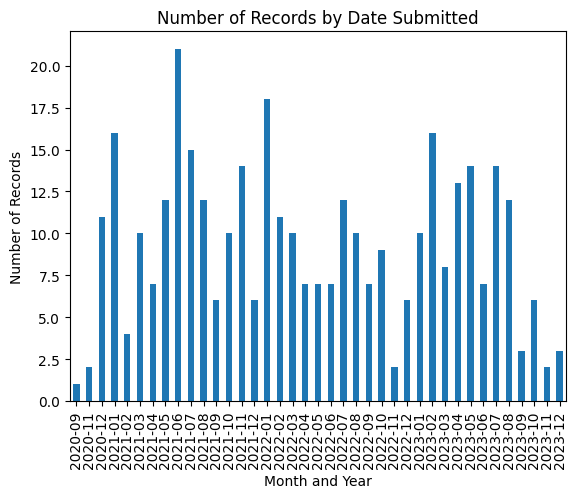

In [37]:
# Step 2: Group by year and month
df['Year/Month'] = df['Date Submitted'].dt.to_period('M')
grouped_submitted = df.groupby('Year/Month').size()

# Step 3: Plot the result
grouped_submitted.plot(kind='bar')
plt.xlabel('Month and Year')
plt.ylabel('Number of Records')
plt.title('Number of Records by Date Submitted')
plt.show()

<Axes: xlabel='Month'>

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Number of Records by Date Submitted')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

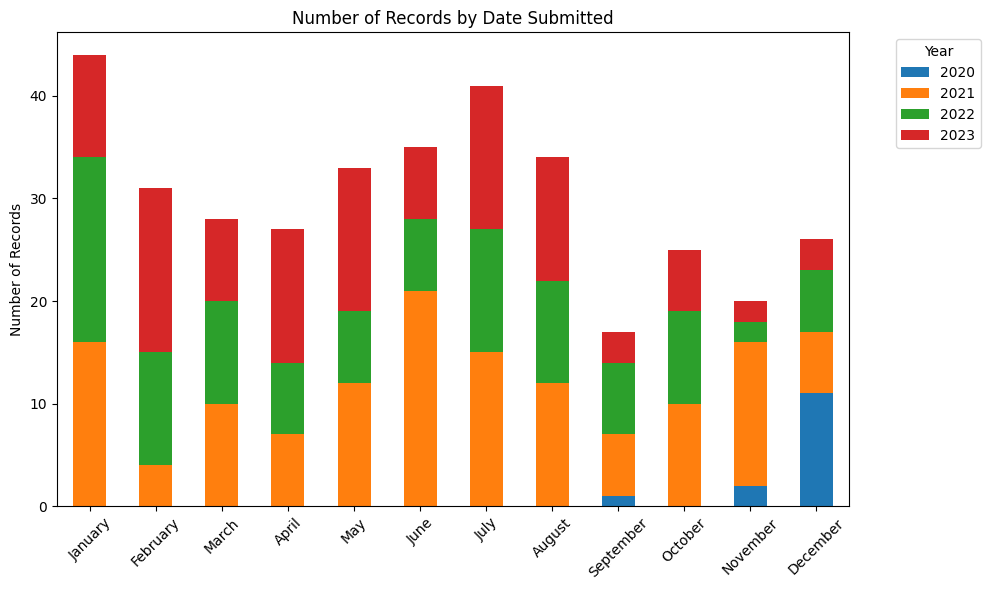

In [55]:
# Step 2: Group by month and year, and aggregate counts
df['Year'] = df['Date Submitted'].dt.year
df['Month'] = df['Date Submitted'].dt.month_name()
grouped_submitted = df.groupby(['Month', 'Year']).size().unstack(fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex to ensure correct month order
grouped_submitted = grouped_submitted.reindex(month_order, axis=0, fill_value=0)

# Step 3: Plot the result
grouped_submitted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.xlabel('')
plt.ylabel('Number of Records')
plt.title('Number of Records by Date Submitted')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='Year/Month'>

Text(0.5, 0, 'Month and Year')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Number of Records by Decision Date')

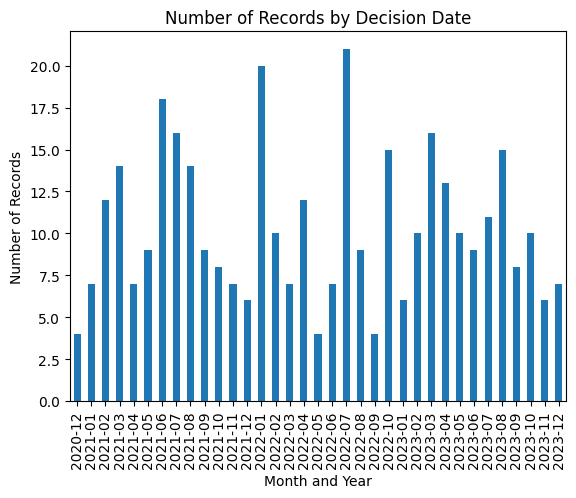

In [38]:
# Step 2: Group by year and month
df['Year/Month'] = df['Decision Date'].dt.to_period('M')
grouped_decision = df.groupby('Year/Month').size()

# Step 3: Plot the result
grouped_decision.plot(kind='bar')
plt.xlabel('Month and Year')
plt.ylabel('Number of Records')
plt.title('Number of Records by Decision Date')
plt.show()


<Axes: xlabel='Month'>

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Number of Records by Decision Date')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

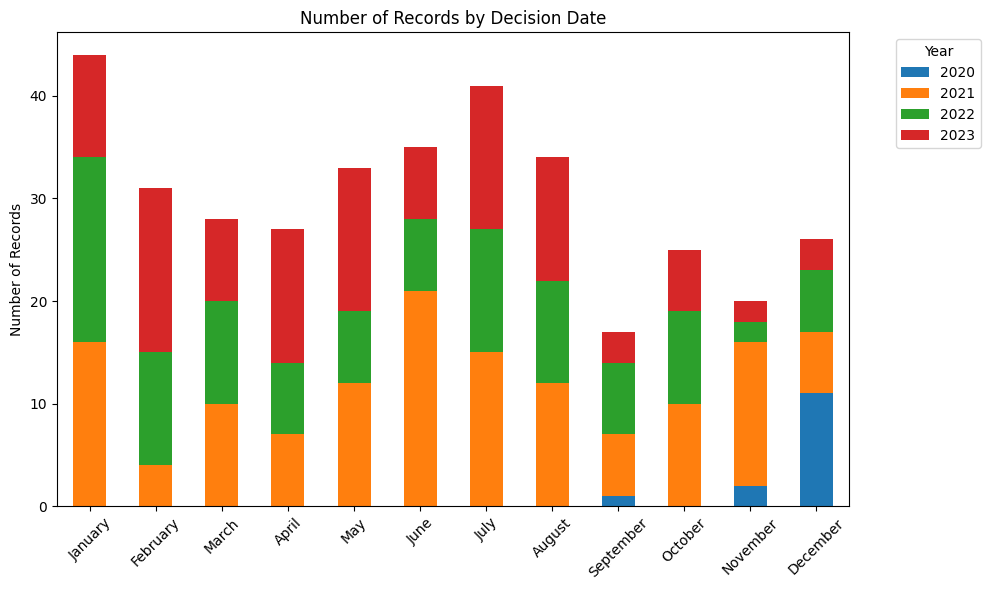

In [56]:
# Step 2: Group by month and year, and aggregate counts
df['Year'] = df['Date Submitted'].dt.year
df['Month'] = df['Date Submitted'].dt.month_name()
grouped_decision = df.groupby(['Month', 'Year']).size().unstack(fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex to ensure correct month order
grouped_decision = grouped_decision.reindex(month_order, axis=0, fill_value=0)

# Step 3: Plot the result
grouped_decision.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.xlabel('')
plt.ylabel('Number of Records')
plt.title('Number of Records by Decision Date')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 0, 'Month and Year')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Number of Records by Month and Year')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '2020-09'),
  Text(1, 0, '2020-11'),
  Text(2, 0, '2020-12'),
  Text(3, 0, '2021-01'),
  Text(4, 0, '2021-02'),
  Text(5, 0, '2021-03'),
  Text(6, 0, '2021-04'),
  Text(7, 0, '2021-05'),
  Text(8, 0, '2021-06'),
  Text(9, 0, '2021-07'),
  Text(10, 0, '2021-08'),
  Text(11, 0, '2021-09'),
  Text(12, 0, '2021-10'),
  Text(13, 0, '2021-11'),
  Text(14, 0, '2021-12'),
  Text(15, 0, '2022-01'),
  Text(16, 0, '2022-02'),
  Text(17, 0, '2022-03'),
  Text(18, 0, '2022-04'),
  Text(19, 0, '2022-05'),
  Text(20, 0, '2022-06'),
  Text(21, 0, '2022-07'),
  Text(22, 0, '2022-08'),
  Text(23, 0, '2022-09'),
  Text(24, 0, '2022-10'),
  Text(25, 0, '2022-11'),
  Text(26, 0, '2022-12'),
  Text(27, 0, '2023-01'),
  Text(28, 0, '2023-02'),
  Text(29, 0, '2023-03'),
  Tex

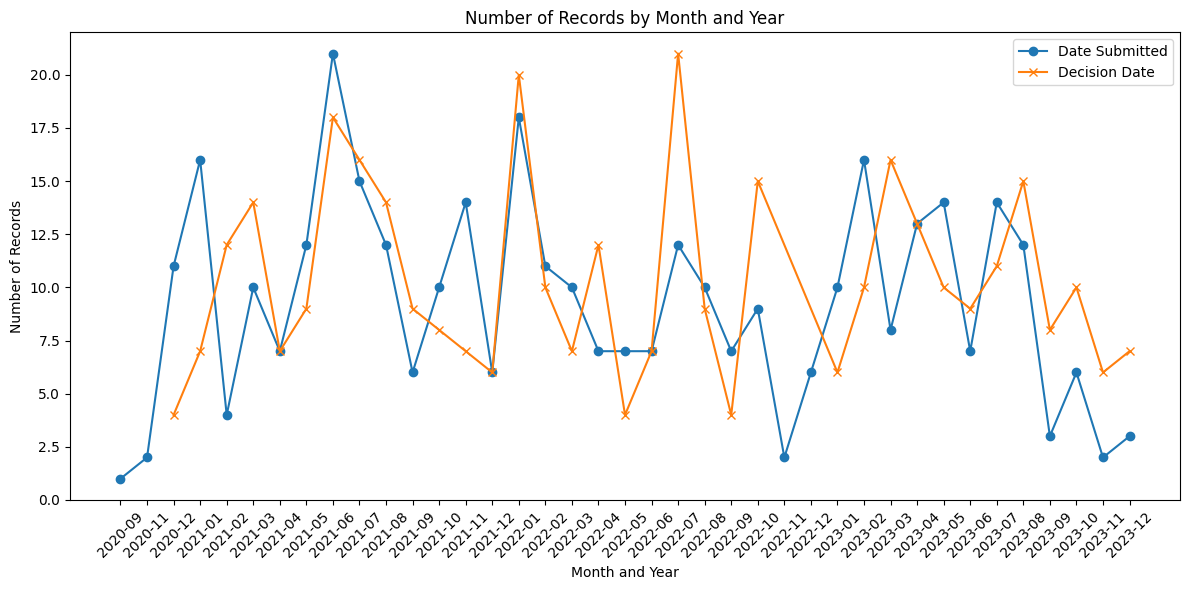

In [39]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
grouped_submitted.index = grouped_submitted.index.astype(str)
grouped_decision.index = grouped_decision.index.astype(str)

ax.plot(grouped_submitted.index, grouped_submitted.values, marker='o', label='Date Submitted')
ax.plot(grouped_decision.index, grouped_decision.values, marker='x', label='Decision Date')

# Customize the plot
ax.set_xlabel('Month and Year')
ax.set_ylabel('Number of Records')
ax.set_title('Number of Records by Month and Year')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
show_values(df, ['Variance Type', 'Council District/ETJ', 'Decision Outcome', 'Land Use', 'Impacted Tree Category'])

Variance Type
Variance Type
AEVR    323
PC       38
Name: count, dtype: int64


Council District/ETJ
Council District/ETJ
ETJ    88
2      66
3      37
4      34
1      30
8      29
10     19
9      17
6      15
5      14
7      12
Name: count, dtype: int64


Decision Outcome
Decision Outcome
Approved                  319
Denied                     25
Approved with Comments     17
Name: count, dtype: int64


Land Use
Land Use
Commercial      186
Residential     149
Multi-Family     14
Industrial       10
Commercial        2
Name: count, dtype: int64


Impacted Tree Category
Impacted Tree Category
Significant                                           84
Large Significant                                     49
NaN                                                   28
Significant and Heritage                              23
Heritage                                              21
Heritage                                              20
Large Significant                                     

In [41]:
classes_columns = ['Variance Type', 'Council District/ETJ', 'Decision Outcome', 'Land Use']

<Axes: xlabel='Variance Type'>

(array([0, 1]), [Text(0, 0, 'AEVR'), Text(1, 0, 'PC')])

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Variance Type')

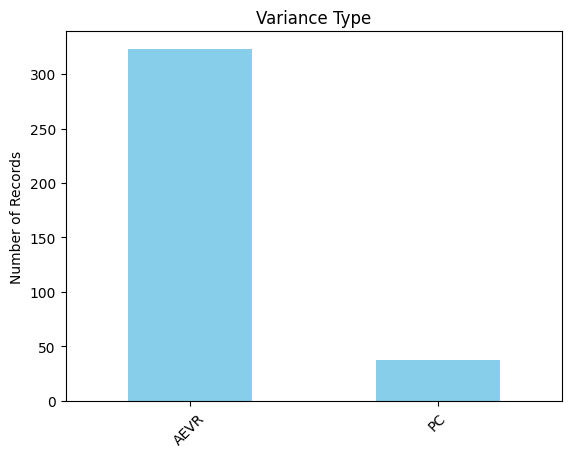

<Axes: xlabel='Council District/ETJ'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ETJ'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '1'),
  Text(5, 0, '8'),
  Text(6, 0, '10'),
  Text(7, 0, '9'),
  Text(8, 0, '6'),
  Text(9, 0, '5'),
  Text(10, 0, '7')])

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Council District/ETJ')

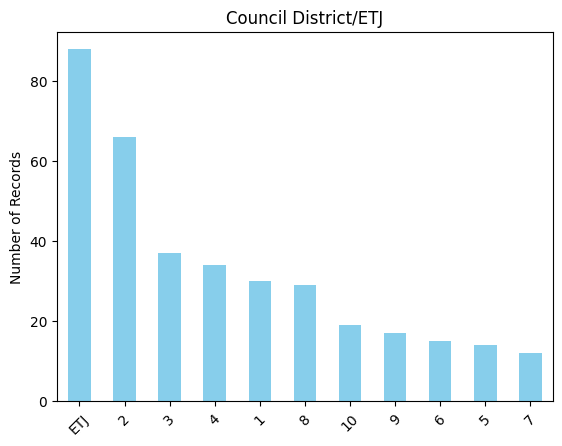

<Axes: xlabel='Decision Outcome'>

(array([0, 1, 2]),
 [Text(0, 0, 'Approved'),
  Text(1, 0, 'Denied'),
  Text(2, 0, 'Approved with Comments')])

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Decision Outcome')

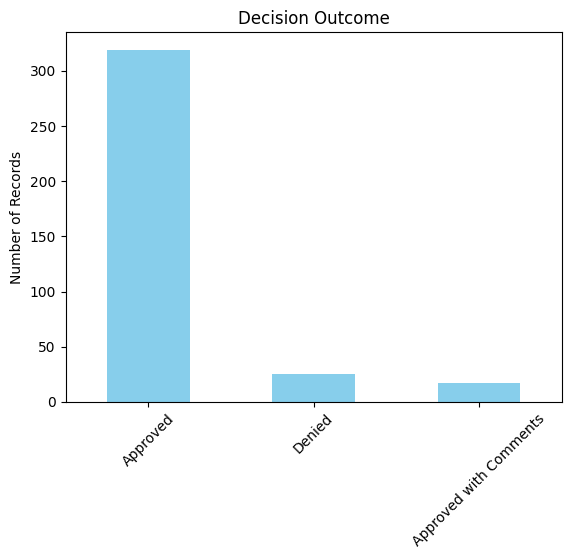

<Axes: xlabel='Land Use'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Commercial'),
  Text(1, 0, 'Residential'),
  Text(2, 0, 'Multi-Family'),
  Text(3, 0, 'Industrial'),
  Text(4, 0, 'Commercial ')])

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Land Use')

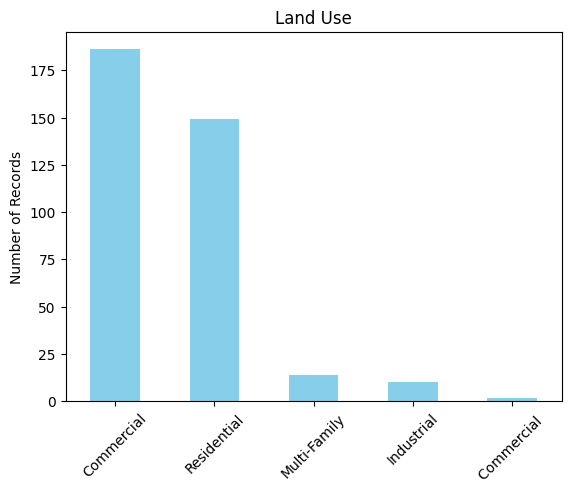

In [42]:
for column in classes_columns:
    # Count the number of occurrences of each class
    class_counts = df[column].value_counts()
    
    # Plot a horizontal bar graph
    class_counts.plot(kind='bar', color='skyblue')

    # Rotate y-axis tick labels 45 degrees clockwise
    plt.xticks(rotation=45)

    # Customize the plot
    plt.xlabel('')
    plt.ylabel('Number of Records')
    plt.title(column)
    
    # Show the plot
    plt.show()

In [43]:
df.columns

Index(['Reporting Period', 'TPV #', 'Variance Type', 'Plat/AP#',
       'Council District/ETJ', 'Location', 'Date Submitted', 'Decision Date',
       'Decision Outcome', 'Owner', 'Land Use', 'Hardship', 'Project Acreage',
       'Impacted Tree Category', 'Dollars Into Fund',
       'Applicant Mitigated above Code', 'Staff Comments', 'Year/Month'],
      dtype='object')

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Records')

Text(0.5, 1.0, 'Land Use')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Commercial'),
  Text(1, 0, 'Commercial '),
  Text(2, 0, 'Industrial'),
  Text(3, 0, 'Multi-Family'),
  Text(4, 0, 'Residential')])

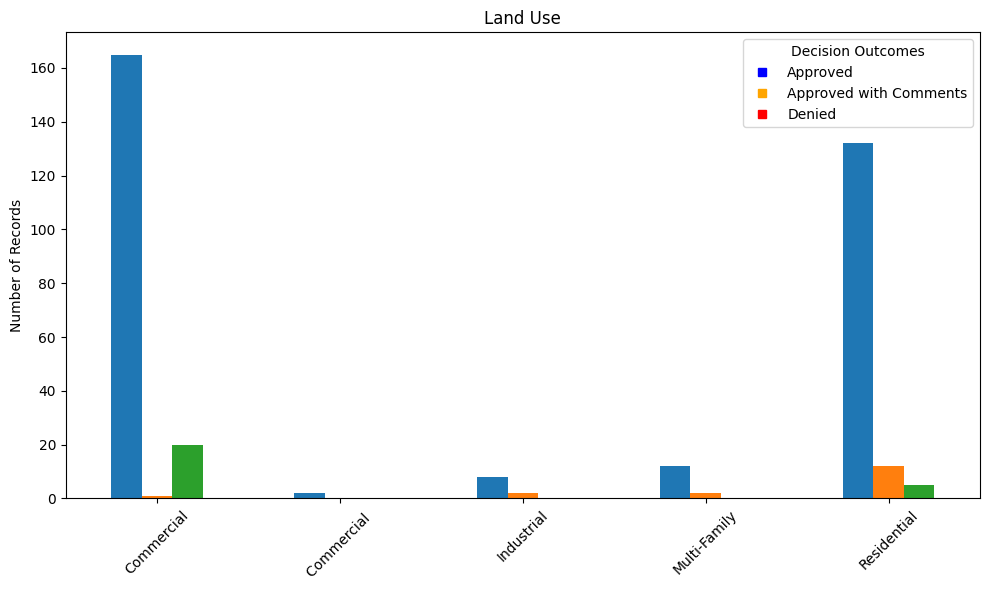

In [52]:
# Group by "Land Use" and "Decision Outcome" and count the records
grouped = df.groupby(['Land Use', 'Decision Outcome']).size().unstack(fill_value=0)

# Plot the grouped bar graph
ax = grouped.plot(kind='bar', figsize=(10, 6))

# Specify colors for the legend labels
colors = {'Approved': 'blue', 'Approved with Comments': 'orange', 'Denied': 'red'}

# Create new handles with specified colors
new_handles = [plt.Line2D([], [], color=colors[label], marker='s', linestyle='') for label in grouped.columns]

# Plot legend with new handles and labels
plt.legend(new_handles, grouped.columns, title='Decision Outcomes')

# Customize the plot
plt.xlabel('')
plt.ylabel('Number of Records')
plt.title('Land Use')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()